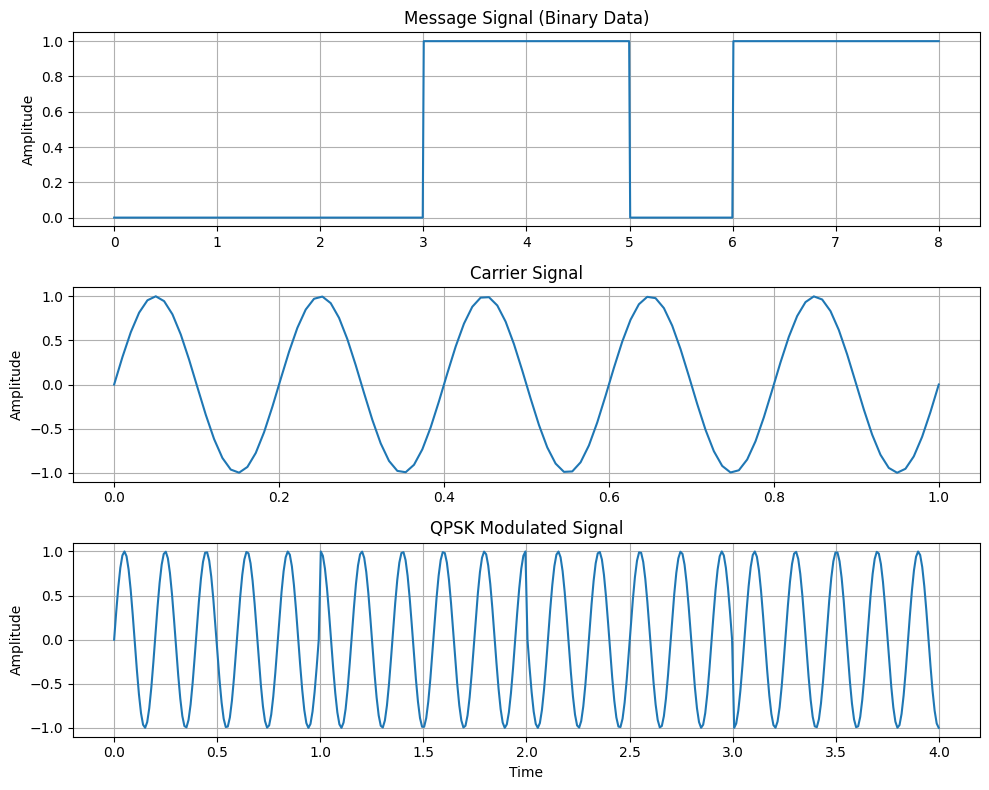

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Input bit stream (even length)
bits = np.array([0, 0, 0, 1, 1, 0, 1, 1])

# QPSK phase mapping
phase_map = {
    (0,0): 0,
    (0,1): np.pi/2,
    (1,0): np.pi,
    (1,1): 3*np.pi/2
}

# Parameters
fc = 5          # carrier frequency
fs = 100        # sampling frequency
Tb = 1          # symbol duration
A = 1           # amplitude

# ----- Message signal (NRZ) -----
samples_per_bit = fs
message_signal = np.repeat(bits, samples_per_bit)

# Time for message
t_msg = np.linspace(0, len(bits), len(message_signal))

# ----- Carrier signal -----
t = np.linspace(0, Tb, fs)
carrier = A * np.sin(2 * np.pi * fc * t)

# ----- QPSK modulation -----
qpsk_signal = []

for i in range(0, len(bits), 2):
    phi = phase_map[(bits[i], bits[i+1])]
    qpsk_symbol = A * np.sin(2 * np.pi * fc * t + phi)
    qpsk_signal.extend(qpsk_symbol)

# Time for QPSK signal
t_qpsk = np.linspace(0, len(bits)/2, len(qpsk_signal))

# ----- Plotting -----
plt.figure(figsize=(10,8))

plt.subplot(3,1,1)
plt.plot(t_msg, message_signal)
plt.title("Message Signal (Binary Data)")
plt.ylabel("Amplitude")
plt.grid()

plt.subplot(3,1,2)
plt.plot(t, carrier)
plt.title("Carrier Signal")
plt.ylabel("Amplitude")
plt.grid()

plt.subplot(3,1,3)
plt.plot(t_qpsk, qpsk_signal)
plt.title("QPSK Modulated Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()
